#Foreplay

In [1]:
# Importa le librerie necessarie
from google.colab import drive
from tqdm import tqdm
from scipy.optimize import minimize
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import pywt
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV, cross_val_predict
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer, recall_score, precision_score, confusion_matrix
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.pipeline import Pipeline
import time
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier




In [2]:
np.random.seed(35)

In [3]:
# Monta il drive di Google
drive.mount('/content/drive')

# Percorso del file CSV
file_path = '/content/drive/MyDrive/dataset/features4.csv'

Mounted at /content/drive


In [4]:
def get_name_columns(df, first_electrode = None, second_electrode = None):
  if first_electrode != None and second_electrode != None:
    return [col for col in df.columns if first_electrode in col or second_electrode in col]


  name_columns = list(df.columns)
  name_columns.remove('target')
  return name_columns

In [5]:
import seaborn as sns
def correlation_feature(df,block_size,correlation_threshold = 0.8, subplot = True, noPlot = None, first_electrode = None, second_electrode = None):
  name_columns = get_name_columns(df,first_electrode, second_electrode)
  blocchi_colonne = []
  for i in range(0, len(name_columns), block_size):
      blocco = name_columns[i:i+block_size]
      blocchi_colonne.append(blocco)
  if noPlot == None:
    if subplot:
      fig, axs = plt.subplots(8, 5, figsize=(15, 20))   # 8 righe, 5 colonne
      plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Aggiunge spazio verticale tra i subplot
    else:
      fig = plt.figure(figsize=(10, 6))
      axs = fig.add_subplot(111)  # A single subplot

  features_to_keep  = []
  # Create a list of features to be removed
  features_to_remove = []


  correlation_dict = {}
  for n, blocco in enumerate(blocchi_colonne):
      corr_matrix  = df[blocco].corr()
      if noPlot == None:
        if subplot:
            ax = axs[n//5, n%5]  # Utilizza l'array axs per definire il subplot
        else:
            ax = axs

        sns.heatmap(corr_matrix , cmap='coolwarm', annot=True, fmt=".2f", cbar=True, ax=ax, annot_kws={"size": 5})  # Imposta la dimensione del testo delle etichette a 8
      if noPlot == None:
        if subplot:
          if n % 5 == 0:
              ax = axs[n//5, 0]  # Utilizza il primo subplot della riga
              ax.set_title(f'Electoroid {n//5 + 1}')  # Imposta il titolo del subplot
          else:
              ax = axs[n//5, n%5]
        ax.set_xticks(range(len(corr_matrix .columns)))
        ax.set_xticklabels(corr_matrix .columns, rotation=90)
        ax.set_yticks(range(len(corr_matrix .columns)))
        ax.set_yticklabels(corr_matrix .columns)

      # Scan the correlation matrix and identify features to be removed
      for i in range(0,len(corr_matrix.columns)):
        values = []
        if corr_matrix.columns[i] not in features_to_remove:
          features_to_keep.append(corr_matrix.columns[i])
          key = corr_matrix.columns[i]
        else:
          key = ""
        for j in range(i+1, len(corr_matrix.columns)):
          if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            # Add the highly correlated feature to the list of features to be removed
            if corr_matrix.columns[i] not in features_to_remove:
              features_to_remove.append(corr_matrix.columns[j])
              if key != "":
                values.append(corr_matrix.columns[j])
        if key != "":
          correlation_dict[key] = values
  if noPlot == None:
    plt.show()  # Mostra la figura con i subplot alla fine del ciclo
  return features_to_remove,correlation_dict


In [6]:
def delete_correlation(features_to_remove):
  # Elimina le colonne dal dataframe
  df.drop(features_to_remove, axis=1, inplace=True)
  return df

In [7]:
def print_correlation(correlation_dict):
#  for key in correlation_dict.keys():
#    values = correlation_dict[key]
#    print(f"{key},{values}\n")
  correlation_dict_copy = correlation_dict.copy()

  # Itera attraverso le coppie chiave-valore del dizionario
  for key, value in correlation_dict.items():
      if not value:
          # Se la lista associata alla chiave è vuota, rimuovi la coppia chiave-valore
          del correlation_dict_copy[key]

  #elimino le coppie key, value i quli valori sono vuoti
  correlation_dict_all = correlation_dict_copy
  feature_delete = []
  for key in correlation_dict_all.keys():
    for value_list in correlation_dict_all[key]:
      if value_list not in feature_delete:
        feature_delete.append(value_list)

  # vedeo quante feature per ogni elettorodo sono stati eliminate
  electroid = [0,0,0,0,0,0,0,0]
  for feature in feature_delete:
    for char in feature:
      if char.isdigit() and int(char) >= 0 and int(char) <= 7:
          electroid[int(char)] += 1
  for i, value in enumerate(electroid):
    removed = round(value / 50,2)
    print(f"For electroid {i+1}, {value}/50 -> {removed} values have been removed")

# Analysis of dataset(no)

Start extracts the csv file

In [ ]:
np.random.seed(35)
df = pd.read_csv(file_path)
df.shape

(125, 401)

I want to see the correlation between all the brain waves of all the electrodes and possibly eliminate the correlations

## Correlation of each brain wave for each electrode

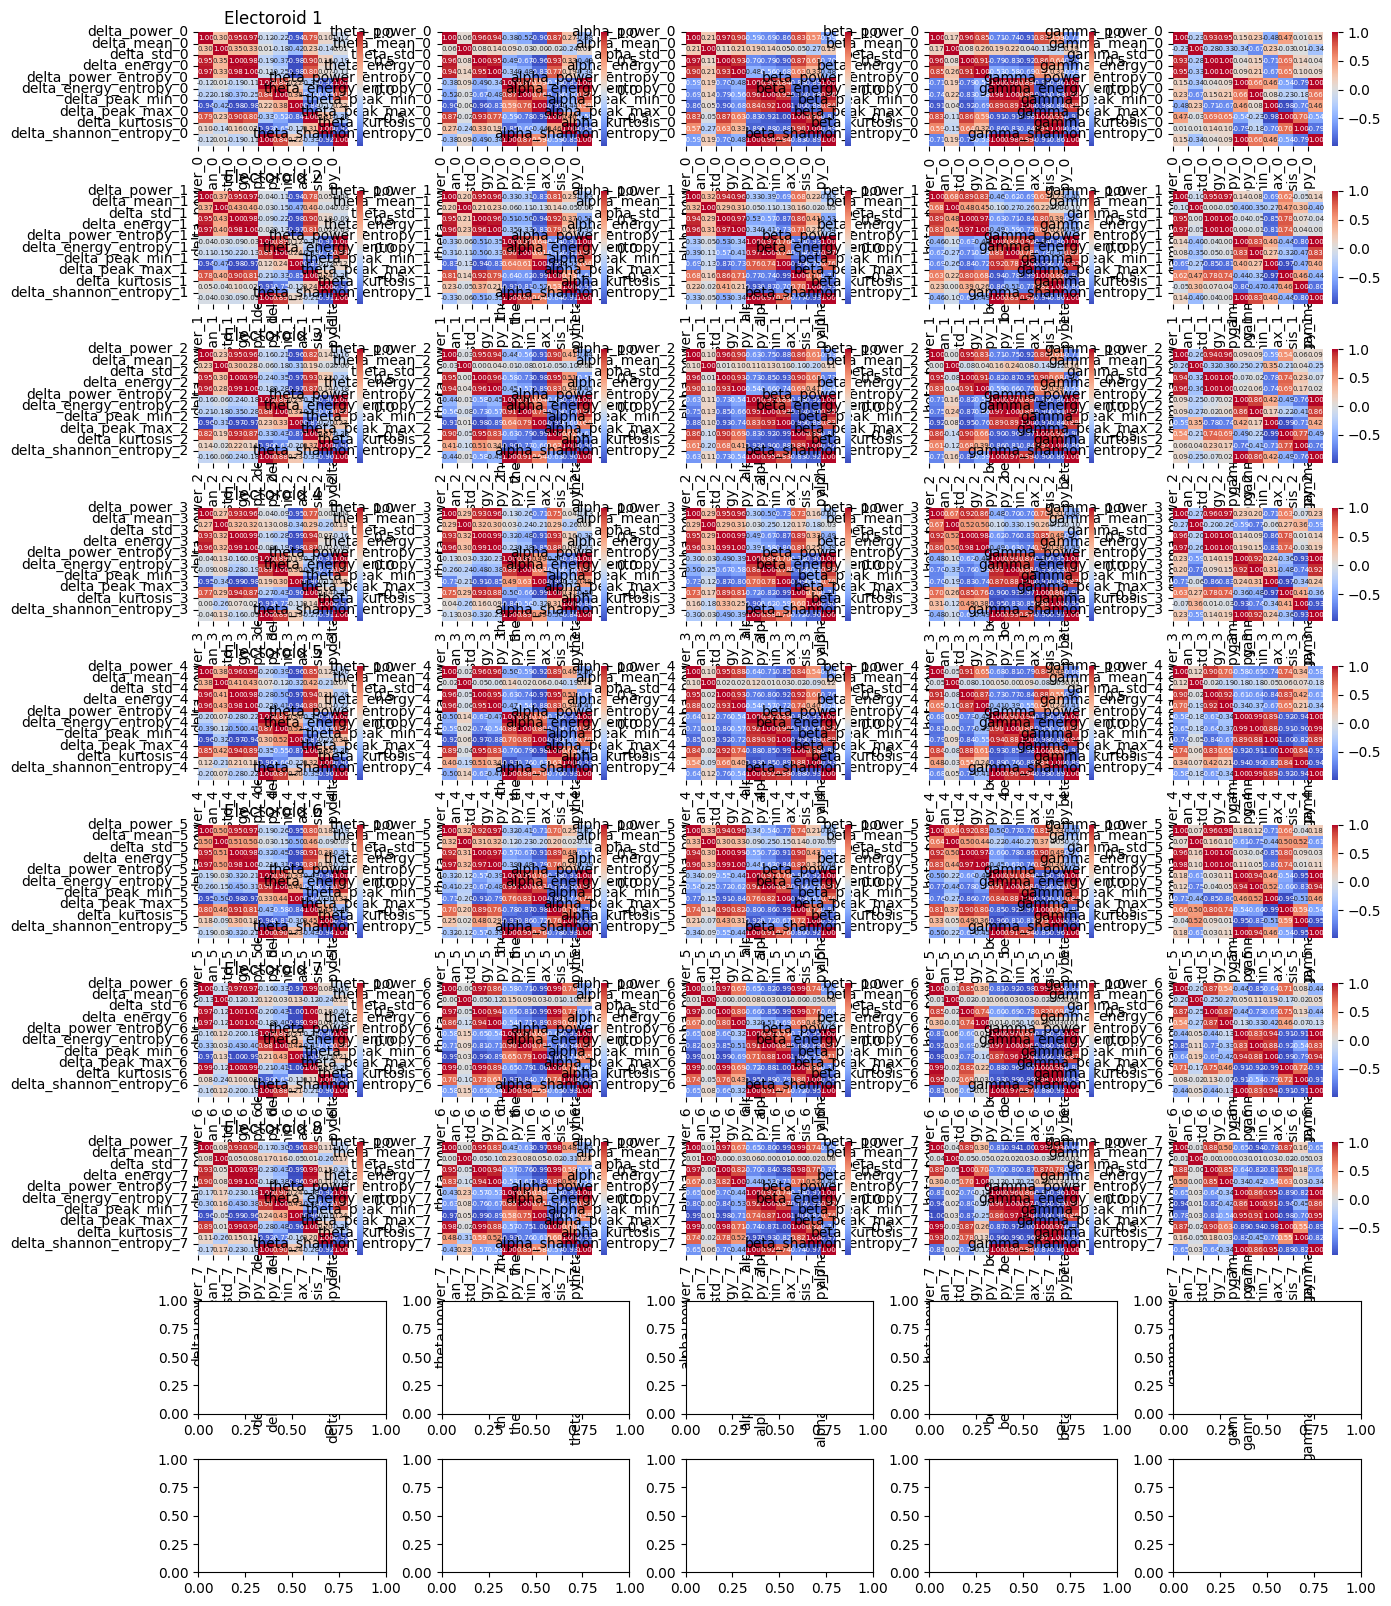

In [ ]:
features_to_remove, correlation_dict = correlation_feature(df, 10, 0.8) #i want to show the correlations between each wave of each electrode
df = delete_correlation(features_to_remove)

In [ ]:
df.shape

(125, 145)

## Correlation of each electrode with all its waves

### Electroide 0

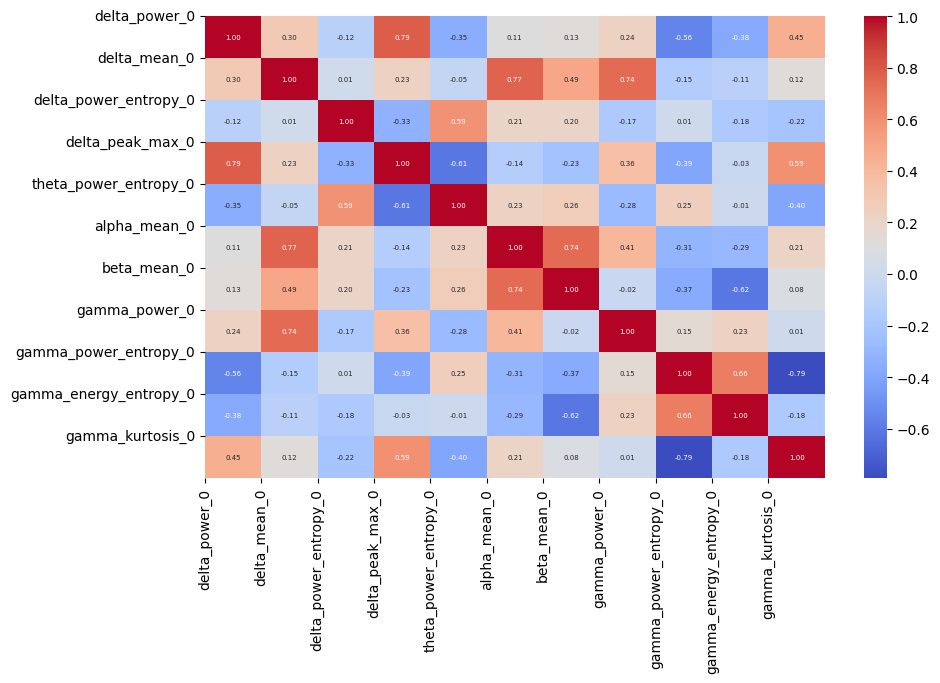

For electroid 1, 0/50 -> 0.0 values have been removed
For electroid 2, 0/50 -> 0.0 values have been removed
For electroid 3, 0/50 -> 0.0 values have been removed
For electroid 4, 0/50 -> 0.0 values have been removed
For electroid 5, 0/50 -> 0.0 values have been removed
For electroid 6, 0/50 -> 0.0 values have been removed
For electroid 7, 0/50 -> 0.0 values have been removed
For electroid 8, 0/50 -> 0.0 values have been removed


(125, 137)

In [ ]:
features_to_remove, correlation_dict_0 = correlation_feature(df, df.shape[1], 0.8,subplot=False,first_electrode= "0",second_electrode= "0") #i want to show the correlations between of each electrode
print_correlation(correlation_dict_0)
df = delete_correlation(features_to_remove)
df.shape

### Electrode 1

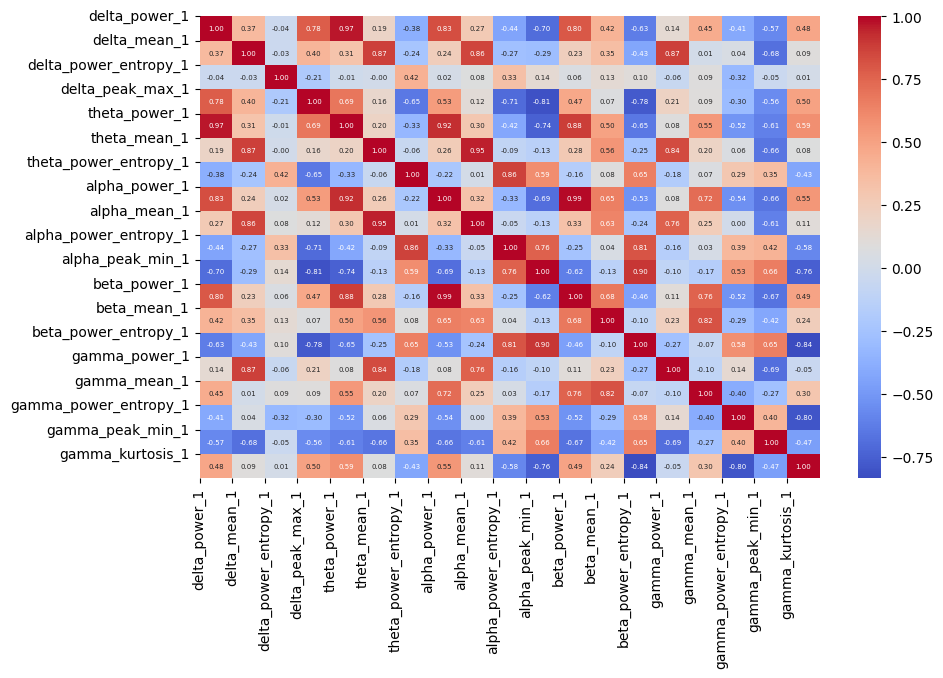

For electroid 1, 0/50 -> 0.0 values have been removed
For electroid 2, 9/50 -> 0.18 values have been removed
For electroid 3, 0/50 -> 0.0 values have been removed
For electroid 4, 0/50 -> 0.0 values have been removed
For electroid 5, 0/50 -> 0.0 values have been removed
For electroid 6, 0/50 -> 0.0 values have been removed
For electroid 7, 0/50 -> 0.0 values have been removed
For electroid 8, 0/50 -> 0.0 values have been removed


(125, 128)

In [ ]:
features_to_remove, correlation_dict_1 = correlation_feature(df, df.shape[1], 0.8,subplot=False,first_electrode= "1",second_electrode= "1")
print_correlation(correlation_dict_1)
df = delete_correlation(features_to_remove)
df.shape

###Electrode 2

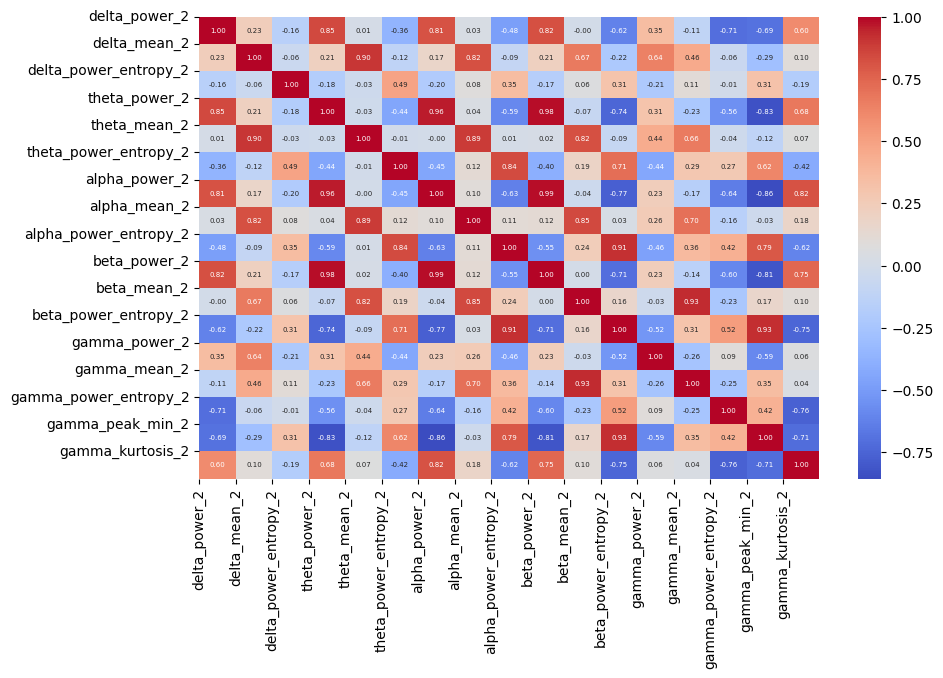

For electroid 1, 0/50 -> 0.0 values have been removed
For electroid 2, 0/50 -> 0.0 values have been removed
For electroid 3, 8/50 -> 0.16 values have been removed
For electroid 4, 0/50 -> 0.0 values have been removed
For electroid 5, 0/50 -> 0.0 values have been removed
For electroid 6, 0/50 -> 0.0 values have been removed
For electroid 7, 0/50 -> 0.0 values have been removed
For electroid 8, 0/50 -> 0.0 values have been removed


(125, 120)

In [ ]:
features_to_remove, correlation_dict_2 = correlation_feature(df, df.shape[1], 0.8,subplot=False,first_electrode= "2",second_electrode= "2")
print_correlation(correlation_dict_2)
df = delete_correlation(features_to_remove)
df.shape

### Electrode 3

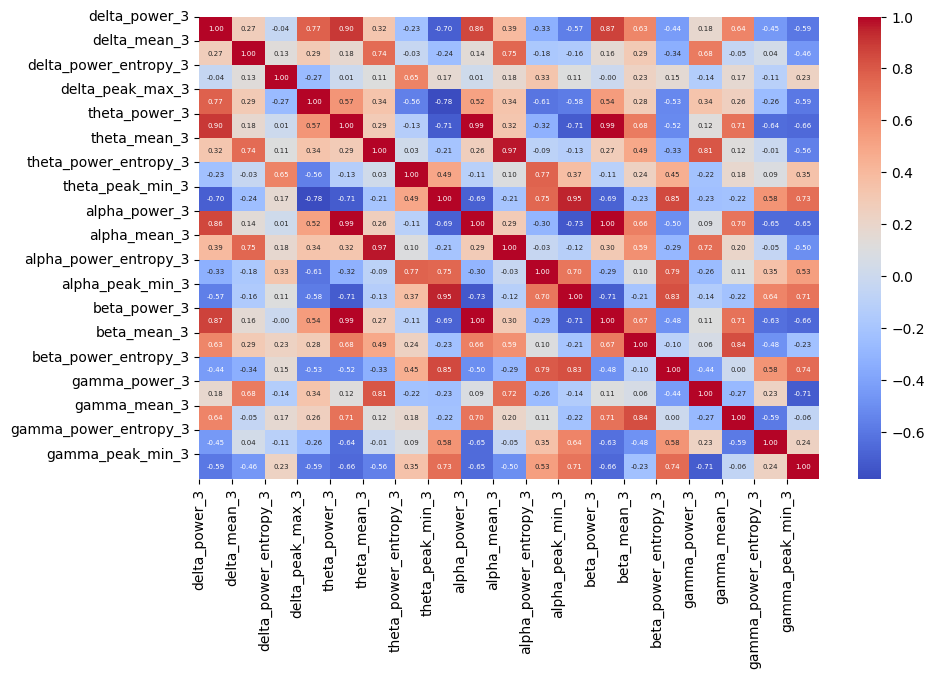

For electroid 1, 0/50 -> 0.0 values have been removed
For electroid 2, 0/50 -> 0.0 values have been removed
For electroid 3, 0/50 -> 0.0 values have been removed
For electroid 4, 8/50 -> 0.16 values have been removed
For electroid 5, 0/50 -> 0.0 values have been removed
For electroid 6, 0/50 -> 0.0 values have been removed
For electroid 7, 0/50 -> 0.0 values have been removed
For electroid 8, 0/50 -> 0.0 values have been removed


(125, 112)

In [ ]:
features_to_remove, correlation_dict_3 = correlation_feature(df, df.shape[1], 0.8,subplot=False,first_electrode= "3",second_electrode= "3")
print_correlation(correlation_dict_3)
df = delete_correlation(features_to_remove)
df.shape

### Electrode 4

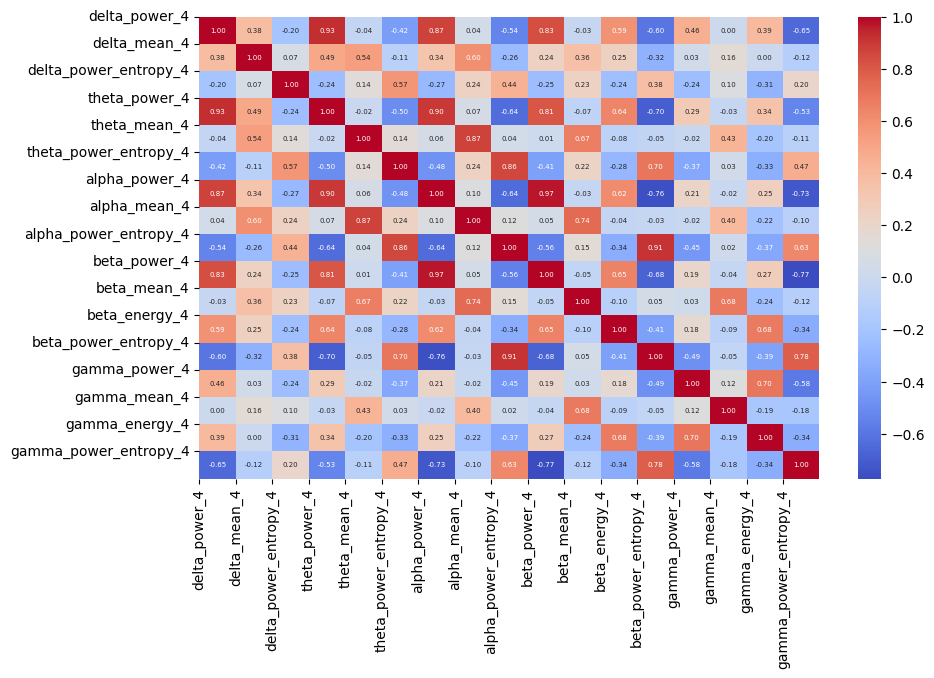

For electroid 1, 0/50 -> 0.0 values have been removed
For electroid 2, 0/50 -> 0.0 values have been removed
For electroid 3, 0/50 -> 0.0 values have been removed
For electroid 4, 0/50 -> 0.0 values have been removed
For electroid 5, 5/50 -> 0.1 values have been removed
For electroid 6, 0/50 -> 0.0 values have been removed
For electroid 7, 0/50 -> 0.0 values have been removed
For electroid 8, 0/50 -> 0.0 values have been removed


(125, 107)

In [ ]:
features_to_remove, correlation_dict_4 = correlation_feature(df, df.shape[1], 0.8,subplot=False,first_electrode= "4",second_electrode= "4")
print_correlation(correlation_dict_4)
df = delete_correlation(features_to_remove)
df.shape

### Electrode 5

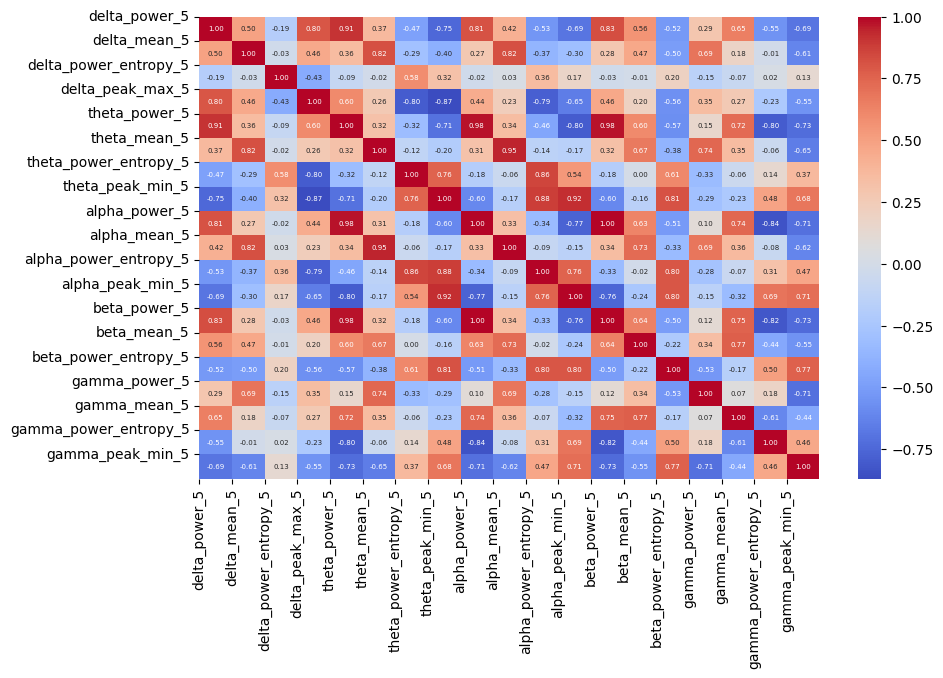

For electroid 1, 0/50 -> 0.0 values have been removed
For electroid 2, 0/50 -> 0.0 values have been removed
For electroid 3, 0/50 -> 0.0 values have been removed
For electroid 4, 0/50 -> 0.0 values have been removed
For electroid 5, 0/50 -> 0.0 values have been removed
For electroid 6, 8/50 -> 0.16 values have been removed
For electroid 7, 0/50 -> 0.0 values have been removed
For electroid 8, 0/50 -> 0.0 values have been removed


(125, 99)

In [ ]:
features_to_remove, correlation_dict_5 = correlation_feature(df, df.shape[1], 0.8,subplot=False,first_electrode= "5",second_electrode= "5")
print_correlation(correlation_dict_5)
df = delete_correlation(features_to_remove)
df.shape

### Electrode 6

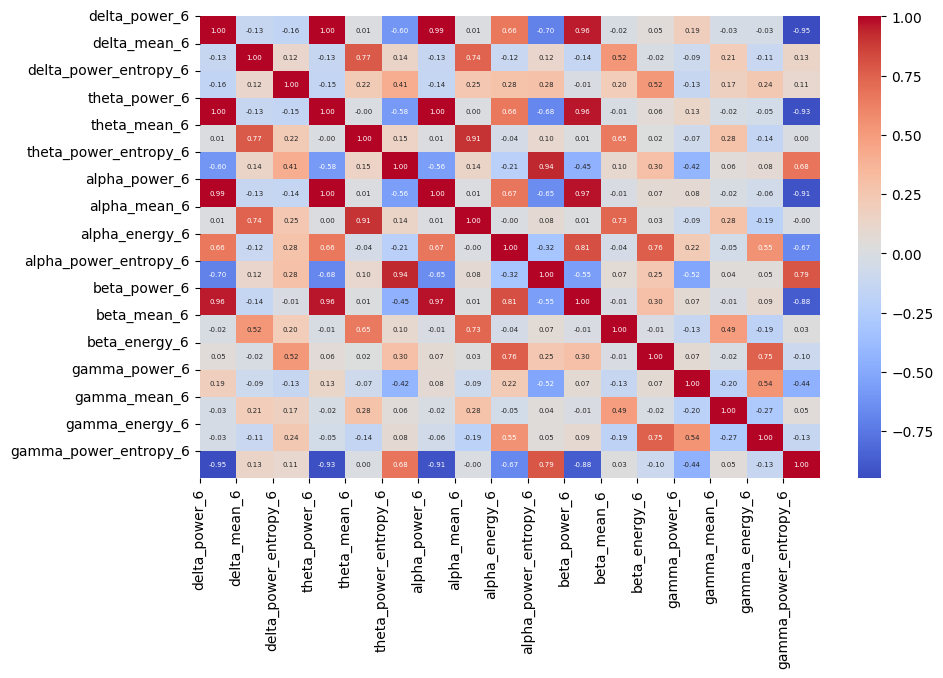

For electroid 1, 0/50 -> 0.0 values have been removed
For electroid 2, 0/50 -> 0.0 values have been removed
For electroid 3, 0/50 -> 0.0 values have been removed
For electroid 4, 0/50 -> 0.0 values have been removed
For electroid 5, 0/50 -> 0.0 values have been removed
For electroid 6, 0/50 -> 0.0 values have been removed
For electroid 7, 6/50 -> 0.12 values have been removed
For electroid 8, 0/50 -> 0.0 values have been removed


(125, 93)

In [ ]:
features_to_remove, correlation_dict_6 = correlation_feature(df, df.shape[1], 0.8,subplot=False,first_electrode= "6",second_electrode= "6")
print_correlation(correlation_dict_6)
df = delete_correlation(features_to_remove)
df.shape

### Electrode 7

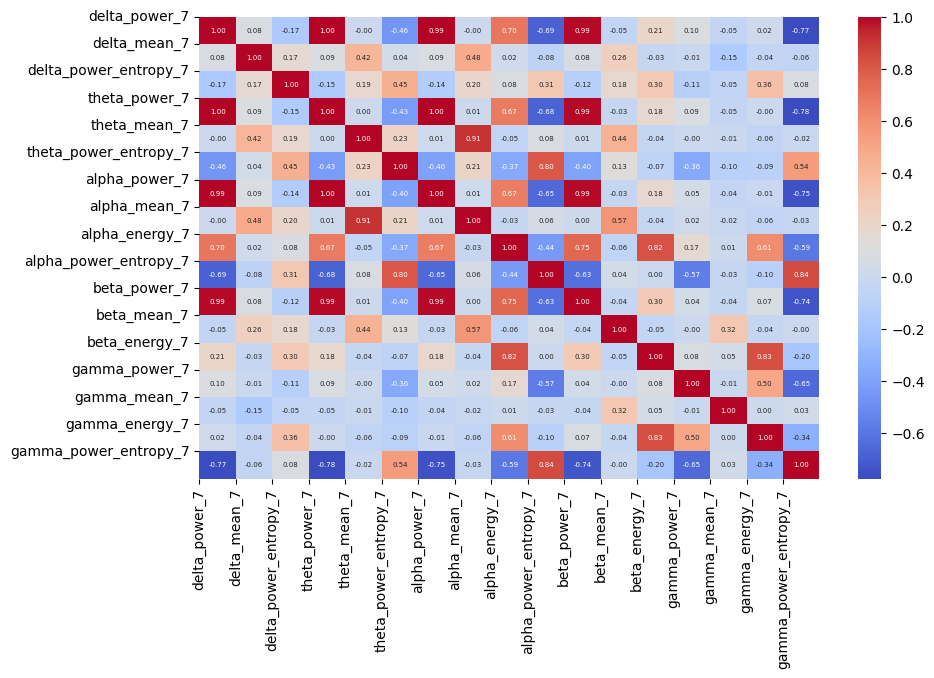

For electroid 1, 0/50 -> 0.0 values have been removed
For electroid 2, 0/50 -> 0.0 values have been removed
For electroid 3, 0/50 -> 0.0 values have been removed
For electroid 4, 0/50 -> 0.0 values have been removed
For electroid 5, 0/50 -> 0.0 values have been removed
For electroid 6, 0/50 -> 0.0 values have been removed
For electroid 7, 0/50 -> 0.0 values have been removed
For electroid 8, 6/50 -> 0.12 values have been removed


(125, 87)

In [ ]:
features_to_remove, correlation_dict_7 = correlation_feature(df, df.shape[1], 0.8,subplot=False,first_electrode= "7",second_electrode= "7")
print_correlation(correlation_dict_7)
df = delete_correlation(features_to_remove)
df.shape

### All Electrode

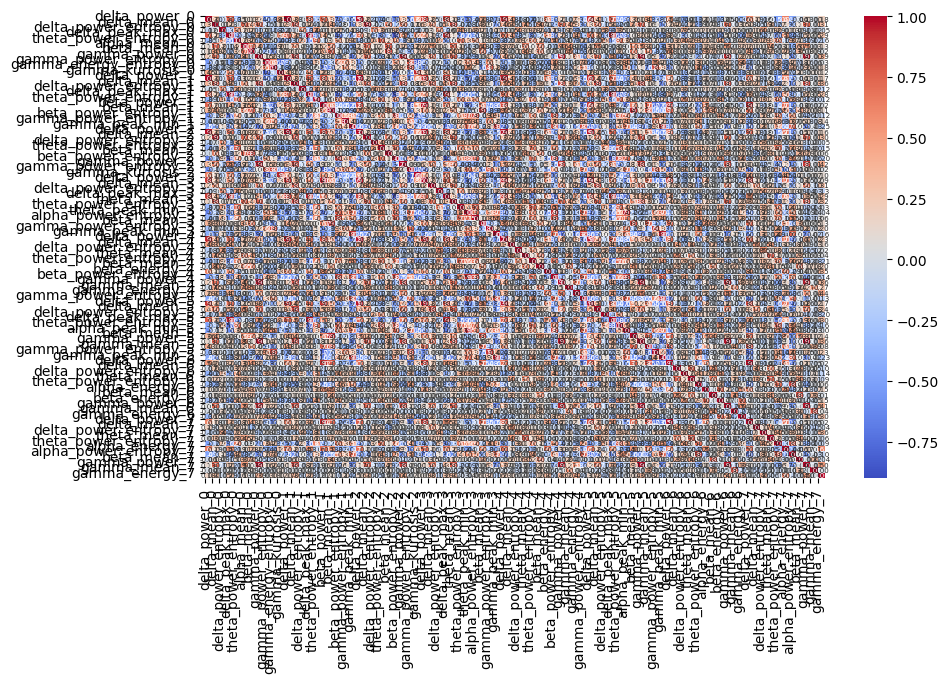

For electroid 1, 0/50 -> 0.0 values have been removed
For electroid 2, 3/50 -> 0.06 values have been removed
For electroid 3, 7/50 -> 0.14 values have been removed
For electroid 4, 7/50 -> 0.14 values have been removed
For electroid 5, 4/50 -> 0.08 values have been removed
For electroid 6, 9/50 -> 0.18 values have been removed
For electroid 7, 2/50 -> 0.04 values have been removed
For electroid 8, 5/50 -> 0.1 values have been removed


(125, 50)

In [ ]:
features_to_remove, correlation_dict_all = correlation_feature(df, df.shape[1], 0.8,subplot=False)
print_correlation(correlation_dict_all)
df = delete_correlation(features_to_remove)
df.shape

#Setting

In [8]:
def plot_ROC(y_test, y_score):

  fpr, tpr, thresholds = roc_curve(y_test, y_score)

  # Crea una lista di soglie da 0.1 a 1 con passo di 0.1
  threshold_list = [x/10 for x in range(1, 11)]

  # Plot della curva ROC
  plt.figure()
  plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc(fpr, tpr))
  plt.plot([0, 1], [0, 1], 'k--')  # Linea di riferimento per il caso casuale
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc='lower right')

  # Plot delle soglie
  for threshold in threshold_list:
      plt.scatter(fpr[thresholds >= threshold][-1], tpr[thresholds >= threshold][-1], c='red')
      plt.annotate(f'Thsd: {threshold}', (fpr[thresholds >= threshold][-1], tpr[thresholds >= threshold][-1]),
                  textcoords="offset points", xytext=(-10,10), ha='center')


  # Calcola la distanza di Youden's J per ciascuna soglia
  youden_j = tpr - fpr

  # Trova l'indice della soglia che massimizza Youden's J
  best_threshold_index = np.argmax(youden_j)

  # Ottieni la migliore soglia
  best_threshold = thresholds[best_threshold_index]

  if best_threshold > 1:
    best_threshold =  best_threshold -1
  print("Best threshold:", best_threshold)


  plt.show()

  return best_threshold

##Collect indices for feature of same class

In [9]:
def indices_X80():
  np.random.seed(35)
  df = pd.read_csv("/content/drive/MyDrive/dataset/features.csv")
  df_shape = df.shape


  #splitto il dataset in feature e target
  X = df.drop('target', axis=1)
  X_copy = X.copy()

  df['target'] = df['target'].apply(lambda x: 1 if x in ['emotion', 'beautiful'] else 0)
  y = df['target']

  # Split del dataset in set di allenamento e test
  X, X_TEST, y, y_TEST = train_test_split(X, y, test_size=0.2, stratify=y)


  #ESTRAGGO INDICE DI X
  data_list = X_copy.values.tolist()

  indici_X = []
  for record in X.values.tolist():
      indice = [i for i, row in enumerate(data_list) if row == record]
      indici_X.extend(indice)


  indices_X_extend = []

  for i in indici_X:

    t = np.concatenate([np.array([i]) * 4, np.array([i]) * 4 + 1, np.array([i]) * 4 + 2, np.array([i]) * 4 + 3])
    indices_X_extend.append(t)
  indices_X_extend = np.concatenate(indices_X_extend)




  #ESTRAGGO INDICI DI TEST
  indici_test = []
  for record in X_TEST.values.tolist():
      indice = [i for i, row in enumerate(data_list) if row == record]
      indici_test.extend(indice)
  indices_test_extend = []

  for i in indici_test:

    t = np.concatenate([np.array([i]) * 4, np.array([i]) * 4 + 1, np.array([i]) * 4 + 2, np.array([i]) * 4 + 3])
    indices_test_extend.append(t)

  #VERIFICO CHE NESSUN INDICE SIA CLONE DELL'ALTRO
  found = False
  for element in indices_test_extend:
      if element in indices_X_extend:
          found = True
          break

  if found:
      print("Almeno un elemento di indices_test_extend è presente in a.")
  else:
    print("Nessun elemento di indices_test_extend è presente in a.")


  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  fold_indices = []
  for train_index, test_index in cv.split(X, y):
      fold_indices.append((train_index, test_index))

  # Salva fold_indices in un file
  with open('/content/drive/MyDrive/dataset/fold_indices80.pkl', 'wb') as file:
      pickle.dump(fold_indices, file)

  return np.concatenate(indices_test_extend)

def indices_X100():
  np.random.seed(35)
  df = pd.read_csv("/content/drive/MyDrive/dataset/features.csv")
  df_shape = df.shape

  #splitto il dataset in feature e target
  X = df.drop('target', axis=1)
  df['target'] = df['target'].apply(lambda x: 1 if x in ['emotion', 'beautiful'] else 0)
  y = df['target']

  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  fold_indices = []
  for train_index, test_index in cv.split(X, y):
      fold_indices.append((train_index, test_index))
  # Salva fold_indices in un file
  with open('/content/drive/MyDrive/dataset/fold_indices100.pkl', 'wb') as file:
      pickle.dump(fold_indices, file)

indices_X80()
indices_X100()

<ipython-input-9-61f131e1e1a2>:53: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if element in indices_X_extend:


Nessun elemento di indices_test_extend è presente in a.


# Set best parameters

In [10]:
import pickle
indices_test = indices_X80()

with open('/content/drive/MyDrive/dataset/fold_indices80.pkl', 'rb') as file:
    fold_indices = pickle.load(file)

split_record = 4
n_split = 5
fold_indices_new = []

for set_fold in fold_indices:
  train = set_fold[0]
  test = set_fold[1]
  train = np.concatenate([train * 4, (train * 4) + 1, (train * 4) + 2, (train * 4) + 3])
  test = np.concatenate([(test * 4), (test * 4) + 1, (test * 4) + 2, (test * 4) + 3])
  fold_indices_new.append((train,test))



Nessun elemento di indices_test_extend è presente in a.


<ipython-input-9-61f131e1e1a2>:53: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if element in indices_X_extend:


In [11]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)


#estraggo il dataset
np.random.seed(35)
df = pd.read_csv(file_path)
df_shape = df.shape

#trovo le correlazioni, mostro le correlazioni e le elimino
features_to_remove, correlation_dict_all = correlation_feature(df, df.shape[1], 0.8,subplot=False, noPlot = 1)
print_correlation(correlation_dict_all)
df = delete_correlation(features_to_remove)
df.shape

#splitto il dataset in feature e target
X = df.drop('target', axis=1)
df['target'] = df['target'].apply(lambda x: 1 if x in ['emotion', 'beautiful'] else 0)
y = df['target']

y_TEST = y.iloc[indices_test]
X_TEST = X.iloc[indices_test]


RandomForest = RandomForestClassifier(max_depth=10, n_estimators=200,min_samples_split= 2)
RFfeature_selection__k = 1

GradientBoosting = GradientBoostingClassifier(learning_rate=1, max_depth=None,n_estimators = 100)
GBfeature_selection__k = 11

svc = SVC(C=10, gamma=0.1, probability=True)
SVCfeature_selection__k= 15

ExtraTrees= ExtraTreesClassifier(max_depth = None,min_samples_split = 2,n_estimators = 100)
ETfeature_selection__k = 5

DecisionTree=DecisionTreeClassifier(min_samples_split=5,max_depth= None)
DTfeature_selection__k = 11

KNeighbors=KNeighborsClassifier(p=1,n_neighbors = 5,weights= 'uniform')
KNfeature_selection__k = 19

LogisticRegres = LogisticRegression(C=10, penalty='l1', solver='liblinear',max_iter =  100)
LRfeature_selection__k = 45

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

For electroid 1, 37/50 -> 0.74 values have been removed
For electroid 2, 40/50 -> 0.8 values have been removed
For electroid 3, 47/50 -> 0.94 values have been removed
For electroid 4, 43/50 -> 0.86 values have been removed
For electroid 5, 37/50 -> 0.74 values have been removed
For electroid 6, 45/50 -> 0.9 values have been removed
For electroid 7, 40/50 -> 0.8 values have been removed
For electroid 8, 41/50 -> 0.82 values have been removed


#Report Random Forest

In [12]:
def prob_train(pipe, X, y):
  best_model = None
  best_score = 0
  best_proba = 0

  for train_index, test_index in fold_indices_new:
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      pipe.fit(X_train, y_train)
      y_pred = pipe.predict(X_train)
      score = f1_score(y_train, y_pred)

      if score > best_score:
          best_model = pipe
          best_score = score

  best_proba = best_model.predict_proba(X)[:, 1]

  return best_model, best_proba

In [13]:
RandomForest = RandomForestClassifier(max_depth=12, n_estimators=200,min_samples_split= 2)
RFfeature_selection__k = 1

estimators = [('scaler', StandardScaler()), ('feature_selection', SelectKBest(k=RFfeature_selection__k)), ('classifier', RandomForest)]
RFpipe = Pipeline(estimators)
RFpipe.fit(X, y)
selected_feature = RFpipe.named_steps['feature_selection'].transform(X)
selected_feature_index = np.where(RFpipe.named_steps['feature_selection'].get_support())[0][0]

# Estrai la colonna corrispondente all'indice selected_feature_index
selected_column = X.iloc[:, selected_feature_index]
selected_column_df = pd.DataFrame(selected_column)

#RFpipe.fit(X_train, y_train)
RFpipe, RFprob = prob_train(RFpipe, selected_column_df, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


In [14]:
selected_column_df

gamma_mean_4
0        0.066500
1        0.149617
2        0.143155
3       -0.006063
4       -0.150919
..            ...
495      0.065134
496     -0.003044
497      0.071710
498     -0.062871
499      0.192695

[500 rows x 1 columns]

Best threshold: 0.4474214908073708


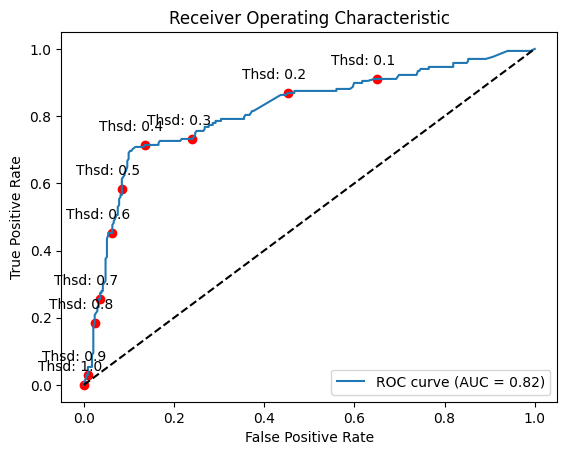

In [17]:
best_threshold= plot_ROC(y, RFprob)

In [85]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)
train_class = apply_threshold(RFprob, best_threshold)

print(classification_report(y,train_class))

confusion_mat = confusion_matrix(y,train_class)
print("Matrice di confusione:")
print(confusion_mat)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       332
           1       0.82      0.78      0.80       168

    accuracy                           0.87       500
   macro avg       0.86      0.85      0.85       500
weighted avg       0.87      0.87      0.87       500

Matrice di confusione:
[[304  28]
 [ 37 131]]


In [87]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)


# Estrai la colonna corrispondente all'indice selected_feature_index
selected_column = X_TEST.iloc[:, selected_feature_index]
selected_column_df = pd.DataFrame(selected_column)

y_pred = RFpipe.predict(selected_column_df)

test_class = apply_threshold(y_pred, best_threshold)

print(classification_report(y_TEST,test_class))

confusion_mat = confusion_matrix(y_TEST,test_class)
print("Matrice di confusione:")
print(confusion_mat)

              precision    recall  f1-score   support

           0       0.85      0.94      0.90        68
           1       0.84      0.66      0.74        32

    accuracy                           0.85       100
   macro avg       0.85      0.80      0.82       100
weighted avg       0.85      0.85      0.84       100

Matrice di confusione:
[[64  4]
 [11 21]]


#Report Gradient Boosting (with 1 feature)

In [15]:
def prob_train(pipe, X, y):
  best_model = None
  best_score = 0
  best_proba = 0


  for train_index, test_index in fold_indices_new:
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      pipe.fit(X_train, y_train)
      y_pred = pipe.predict(X_train)
      score = f1_score(y_train, y_pred)

      if score > best_score:
          best_model = pipe
          best_score = score

  best_proba = best_model.predict_proba(X)[:, 1]

  return best_model, best_proba

In [17]:
GradientBoosting = GradientBoostingClassifier(learning_rate=0.2, max_depth=None,n_estimators = 100)
GBfeature_selection__k = 1
estimators = [('scaler', StandardScaler()), ('feature_selection', SelectKBest(k=GBfeature_selection__k)), ('classifier', GradientBoosting)]
GBpipe = Pipeline(estimators)
#RFpipe.fit(X_train, y_train)
GBpipe, GBprob = prob_train(GBpipe, selected_column_df, y)

Best threshold: 0.9999999517973214


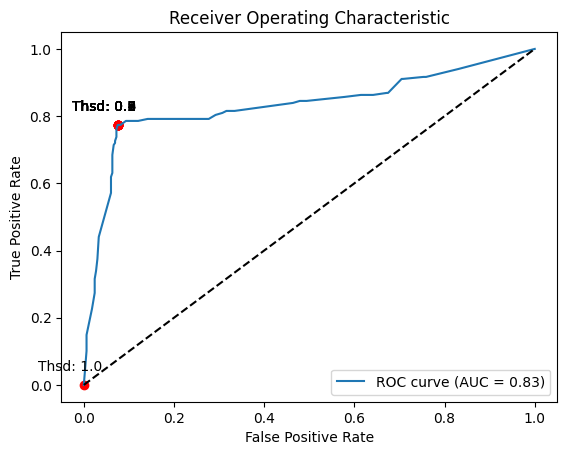

In [19]:
best_threshold= plot_ROC(y, GBprob)

Train report

In [20]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)
train_class = apply_threshold(GBprob, best_threshold)

print(classification_report(y,train_class))

confusion_mat = confusion_matrix(y,train_class)
print("Matrice di confusione:")
print(confusion_mat)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       332
           1       0.84      0.77      0.80       168

    accuracy                           0.87       500
   macro avg       0.86      0.85      0.86       500
weighted avg       0.87      0.87      0.87       500

Matrice di confusione:
[[307  25]
 [ 38 130]]


Test report

In [22]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)
selected_column = X_TEST.iloc[:, selected_feature_index]
selected_column_df = pd.DataFrame(selected_column)

y_pred = GBpipe.predict(selected_column_df)



test_class = apply_threshold(y_pred, best_threshold)

print(classification_report(y_TEST,test_class))

confusion_mat = confusion_matrix(y_TEST,test_class)
print("Matrice di confusione:")
print(confusion_mat)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        68
           1       0.81      0.66      0.72        32

    accuracy                           0.84       100
   macro avg       0.83      0.79      0.81       100
weighted avg       0.84      0.84      0.84       100

Matrice di confusione:
[[63  5]
 [11 21]]


#Report Gradient Boosting (11 original features)

In [ ]:
def prob_train(pipe, X, y):
  best_model = None
  best_score = 0
  best_proba = 0


  for train_index, test_index in fold_indices_new:
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      pipe.fit(X_train, y_train)
      y_pred = pipe.predict(X_train)
      score = f1_score(y_train, y_pred)

      if score > best_score:
          best_model = pipe
          best_score = score

  best_proba = best_model.predict_proba(X)[:, 1]

  return best_model, best_proba

In [ ]:
GradientBoosting = GradientBoostingClassifier(learning_rate=0.2, max_depth=None,n_estimators = 100)
GBfeature_selection__k = 11
estimators = [('scaler', StandardScaler()), ('feature_selection', SelectKBest(k=GBfeature_selection__k)), ('classifier', GradientBoosting)]
GBpipe = Pipeline(estimators)
#RFpipe.fit(X_train, y_train)
GBpipe, GBprob = prob_train(GBpipe, X, y)

Best threshold: 0.003292721826168578


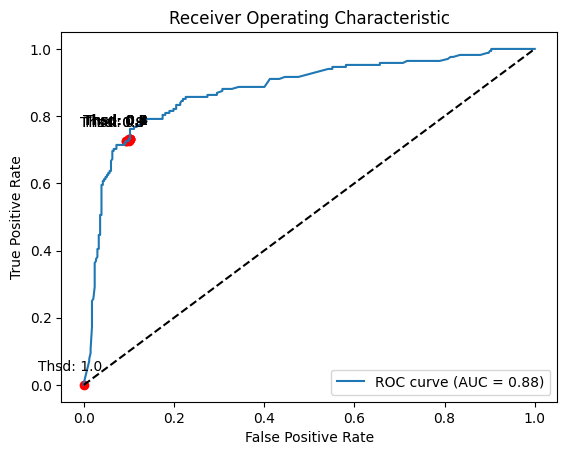

In [ ]:
best_threshold= plot_ROC(y, GBprob)

Train report

In [ ]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)
train_class = apply_threshold(GBprob, best_threshold)

print(classification_report(y,train_class))

confusion_mat = confusion_matrix(y,train_class)
print("Matrice di confusione:")
print(confusion_mat)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       332
           1       0.79      0.76      0.78       168

    accuracy                           0.85       500
   macro avg       0.84      0.83      0.83       500
weighted avg       0.85      0.85      0.85       500

Matrice di confusione:
[[298  34]
 [ 40 128]]


Test report

In [ ]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)

y_pred = GBpipe.predict(X_TEST)

test_class = apply_threshold(y_pred, best_threshold)

print(classification_report(y_TEST,test_class))

confusion_mat = confusion_matrix(y_TEST,test_class)
print("Matrice di confusione:")
print(confusion_mat)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        68
           1       0.66      0.59      0.62        32

    accuracy                           0.77       100
   macro avg       0.74      0.72      0.73       100
weighted avg       0.77      0.77      0.77       100

Matrice di confusione:
[[58 10]
 [13 19]]


#Report SVC

In [32]:
def prob_train(pipe, X, y):
  best_model = None
  best_score = 0
  best_proba = 0

  for train_index, test_index in fold_indices_new:
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      pipe.fit(X_train, y_train)
      y_pred = pipe.predict(X_train)
      score = f1_score(y_train, y_pred)

      if score > best_score:
          best_model = pipe
          best_score = score

  best_proba = best_model.predict_proba(X)[:, 1]

  return best_model, best_proba

In [33]:
svc = SVC(C=10, gamma=0.1, probability=True)
SVCfeature_selection__k= 15

estimators = [('scaler', StandardScaler()), ('feature_selection', SelectKBest(k=SVCfeature_selection__k)), ('classifier', svc)]
SVCpipe = Pipeline(estimators)
#RFpipe.fit(X_train, y_train)
SVCpipe, SVCprob = prob_train(SVCpipe, X, y)

Best threshold: 0.31336439851268416


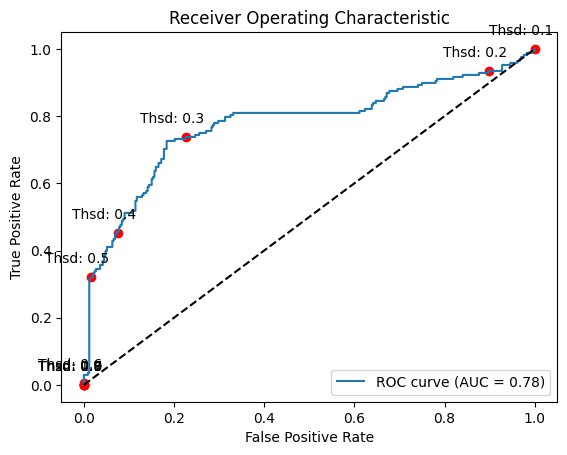

In [34]:
best_threshold= plot_ROC(y, SVCprob)

Train report

In [35]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)
train_class = apply_threshold(SVCprob, best_threshold)

print(classification_report(y,train_class))

confusion_mat = confusion_matrix(y,train_class)
print("Matrice di confusione:")
print(confusion_mat)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       332
           1       0.67      0.73      0.70       168

    accuracy                           0.79       500
   macro avg       0.76      0.77      0.77       500
weighted avg       0.79      0.79      0.79       500

Matrice di confusione:
[[271  61]
 [ 46 122]]


Test report

In [38]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)

y_pred = SVCpipe.predict(X_TEST)

test_class = apply_threshold(y_pred, best_threshold)

print(classification_report(y_TEST,test_class))

confusion_mat = confusion_matrix(y_TEST,test_class)
print("Matrice di confusione:")
print(confusion_mat)

              precision    recall  f1-score   support

           0       0.74      0.88      0.81        68
           1       0.58      0.34      0.43        32

    accuracy                           0.71       100
   macro avg       0.66      0.61      0.62       100
weighted avg       0.69      0.71      0.69       100

Matrice di confusione:
[[60  8]
 [21 11]]


#Report Extra Trees

In [39]:
def prob_train(pipe, X, y):
  best_model = None
  best_score = 0
  best_proba = 0

  for train_index, test_index in fold_indices_new:
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      pipe.fit(X_train, y_train)
      y_pred = pipe.predict(X_train)
      score = f1_score(y_train, y_pred)

      if score > best_score:
          best_model = pipe
          best_score = score

  best_proba = best_model.predict_proba(X)[:, 1]

  return best_model, best_proba

In [40]:
ExtraTrees= ExtraTreesClassifier(max_depth = None,min_samples_split = 2,n_estimators = 100)
ETfeature_selection__k = 5

estimators = [('scaler', StandardScaler()), ('feature_selection', SelectKBest(k=ETfeature_selection__k)), ('classifier', ExtraTrees)]
ETpipe = Pipeline(estimators)
#RFpipe.fit(X_train, y_train)
ETpipe, ETprob = prob_train(ETpipe, X, y)

Best threshold: 0.39


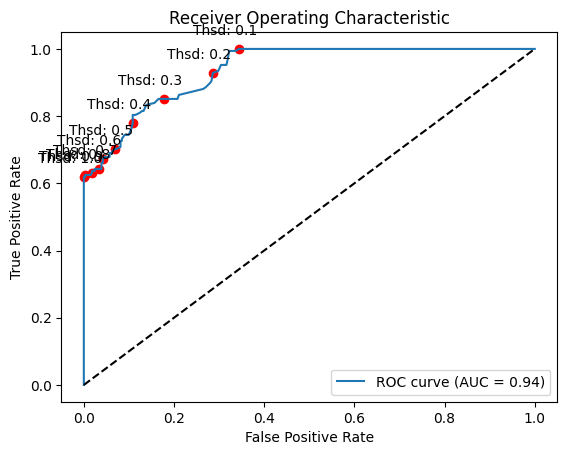

In [41]:
best_threshold= plot_ROC(y, ETprob)

Train report

In [42]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)
train_class = apply_threshold(ETprob, best_threshold)

print(classification_report(y,train_class))

confusion_mat = confusion_matrix(y,train_class)
print("Matrice di confusione:")
print(confusion_mat)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       332
           1       0.79      0.80      0.80       168

    accuracy                           0.86       500
   macro avg       0.84      0.85      0.85       500
weighted avg       0.86      0.86      0.86       500

Matrice di confusione:
[[296  36]
 [ 33 135]]


Test report

In [45]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)

y_pred = ETpipe.predict(X_TEST)

test_class = apply_threshold(y_pred, best_threshold)

print(classification_report(y_TEST,test_class))

confusion_mat = confusion_matrix(y_TEST,test_class)
print("Matrice di confusione:")
print(confusion_mat)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91        68
           1       0.95      0.62      0.75        32

    accuracy                           0.87       100
   macro avg       0.90      0.81      0.83       100
weighted avg       0.88      0.87      0.86       100

Matrice di confusione:
[[67  1]
 [12 20]]


#Report Decision Tree

In [46]:
def prob_train(pipe, X, y):
  best_model = None
  best_score = 0
  best_proba = 0

  for train_index, test_index in fold_indices_new:
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      pipe.fit(X_train, y_train)
      y_pred = pipe.predict(X_train)
      score = f1_score(y_train, y_pred)

      if score > best_score:
          best_model = pipe
          best_score = score

  best_proba = best_model.predict_proba(X)[:, 1]

  return best_model, best_proba

In [47]:
DecisionTree=DecisionTreeClassifier(min_samples_split=5,max_depth= None)
DTfeature_selection__k = 11

estimators = [('scaler', StandardScaler()), ('feature_selection', SelectKBest(k=DTfeature_selection__k)), ('classifier', DecisionTree)]
DTpipe = Pipeline(estimators)
#RFpipe.fit(X_train, y_train)
DTpipe, DTprob = prob_train(DTpipe, X, y)

Best threshold: 0.3333333333333333


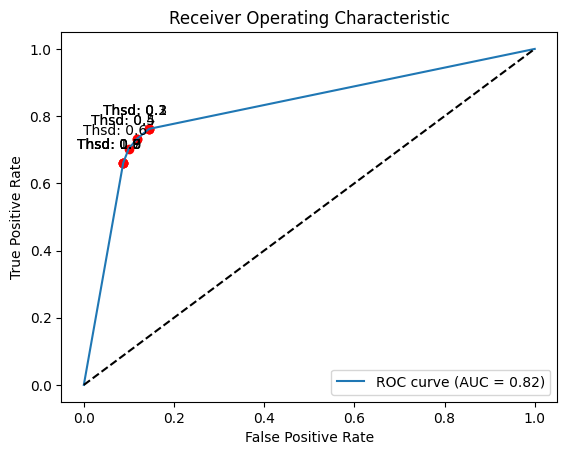

In [48]:
best_threshold= plot_ROC(y, DTprob)

Train report

In [49]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)
train_class = apply_threshold(DTprob, best_threshold)

print(classification_report(y,train_class))

confusion_mat = confusion_matrix(y,train_class)
print("Matrice di confusione:")
print(confusion_mat)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       332
           1       0.73      0.76      0.74       168

    accuracy                           0.82       500
   macro avg       0.80      0.81      0.81       500
weighted avg       0.83      0.82      0.82       500

Matrice di confusione:
[[284  48]
 [ 40 128]]


Test report

In [ ]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)

y_pred = DTpipe.predict(X_TEST)

test_class = apply_threshold(y_pred, 0.5)

print(classification_report(y_TEST,test_class))

confusion_mat = confusion_matrix(y_TEST,test_class)
print("Matrice di confusione:")
print(confusion_mat)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        68
           1       0.67      0.62      0.65        32

    accuracy                           0.78       100
   macro avg       0.75      0.74      0.74       100
weighted avg       0.78      0.78      0.78       100

Matrice di confusione:
[[58 10]
 [12 20]]


#Report KNeighbors

In [50]:
def prob_train(pipe, X, y):
  best_model = None
  best_score = 0
  best_proba = 0

  for train_index, test_index in fold_indices_new:
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      pipe.fit(X_train, y_train)
      y_pred = pipe.predict(X_train)
      score = f1_score(y_train, y_pred)

      if score > best_score:
          best_model = pipe
          best_score = score

  best_proba = best_model.predict_proba(X)[:, 1]

  return best_model, best_proba

In [51]:
KNeighbors=KNeighborsClassifier(p=1,n_neighbors = 5,weights= 'uniform')
KNfeature_selection__k = 19

estimators = [('scaler', StandardScaler()), ('feature_selection', SelectKBest(k=KNfeature_selection__k)), ('classifier', KNeighbors)]
KNpipe = Pipeline(estimators)
#RFpipe.fit(X_train, y_train)
KNpipe, KNprob = prob_train(KNpipe, X, y)

Best threshold: 0.4


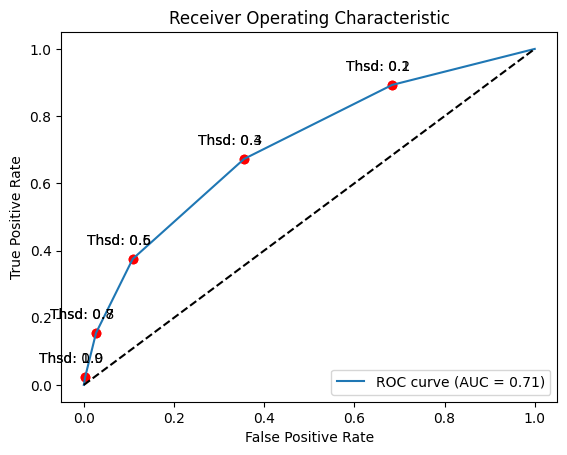

In [52]:
best_threshold= plot_ROC(y, KNprob)

Train report

In [53]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)

train_class = apply_threshold(KNprob, best_threshold)

print(classification_report(y,train_class))

confusion_mat = confusion_matrix(y,train_class)
print("Matrice di confusione:")
print(confusion_mat)

              precision    recall  f1-score   support

           0       0.80      0.64      0.71       332
           1       0.49      0.67      0.57       168

    accuracy                           0.65       500
   macro avg       0.64      0.66      0.64       500
weighted avg       0.69      0.65      0.66       500

Matrice di confusione:
[[214 118]
 [ 55 113]]


Test report

In [54]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)

y_pred = KNpipe.predict(X_TEST)

test_class = apply_threshold(y_pred, best_threshold)

print(classification_report(y_TEST,test_class))

confusion_mat = confusion_matrix(y_TEST,test_class)
print("Matrice di confusione:")
print(confusion_mat)

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        68
           1       0.53      0.28      0.37        32

    accuracy                           0.69       100
   macro avg       0.63      0.58      0.58       100
weighted avg       0.66      0.69      0.66       100

Matrice di confusione:
[[60  8]
 [23  9]]


#Report Logistic Regression

In [55]:
def prob_train(pipe, X, y):
  best_model = None
  best_score = 0
  best_proba = 0

  for train_index, test_index in fold_indices_new:
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      pipe.fit(X_train, y_train)
      y_pred = pipe.predict(X_train)
      score = f1_score(y_train, y_pred)

      if score > best_score:
          best_model = pipe
          best_score = score

  best_proba = best_model.predict_proba(X)[:, 1]

  return best_model, best_proba

In [56]:
LogisticRegres = LogisticRegression(C=10, penalty='l1', solver='liblinear',max_iter =  100)
LRfeature_selection__k = 45

estimators = [('scaler', StandardScaler()), ('feature_selection', SelectKBest(k=LRfeature_selection__k)), ('classifier', LogisticRegres)]
LRpipe = Pipeline(estimators)
#RFpipe.fit(X_train, y_train)
LRpipe, LRprob = prob_train(KNpipe, X, y)

Best threshold: 0.4


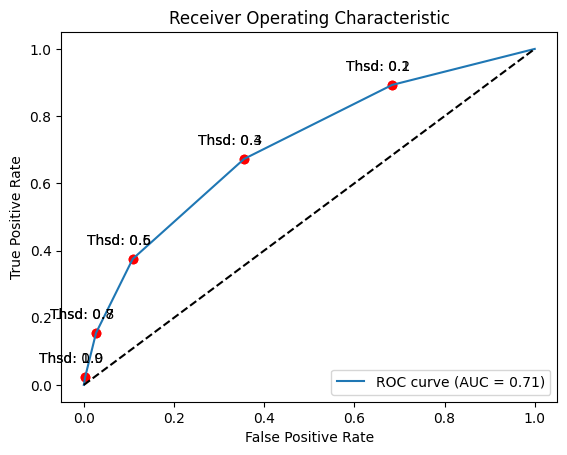

In [57]:
best_threshold= plot_ROC(y, LRprob)

Train report

In [58]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)
train_class = apply_threshold(LRprob, best_threshold)

print(classification_report(y,train_class))

confusion_mat = confusion_matrix(y,train_class)
print("Matrice di confusione:")
print(confusion_mat)

              precision    recall  f1-score   support

           0       0.80      0.64      0.71       332
           1       0.49      0.67      0.57       168

    accuracy                           0.65       500
   macro avg       0.64      0.66      0.64       500
weighted avg       0.69      0.65      0.66       500

Matrice di confusione:
[[214 118]
 [ 55 113]]


Test report

In [59]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)

y_pred = LRpipe.predict(X_TEST)

test_class = apply_threshold(y_pred, best_threshold)

print(classification_report(y_TEST,test_class))

confusion_mat = confusion_matrix(y_TEST,test_class)
print("Matrice di confusione:")
print(confusion_mat)

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        68
           1       0.53      0.28      0.37        32

    accuracy                           0.69       100
   macro avg       0.63      0.58      0.58       100
weighted avg       0.66      0.69      0.66       100

Matrice di confusione:
[[60  8]
 [23  9]]


#Ensemble with combination

In [24]:
def prob_train(pipe, X, y):
  best_model = None
  best_score = 0
  best_proba = 0

  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      pipe.fit(X_train, y_train)
      y_pred = pipe.predict(X_train)
      score = f1_score(y_train, y_pred)

      if score > best_score:
          best_model = pipe
          best_score = score

  best_proba = best_model.predict_proba(X)[:, 1]

  return best_model, best_proba

In [25]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)


#estraggo il dataset
np.random.seed(35)
df = pd.read_csv(file_path)
df_shape = df.shape

#trovo le correlazioni, mostro le correlazioni e le elimino
features_to_remove, correlation_dict_all = correlation_feature(df, df.shape[1], 0.8,subplot=False, noPlot = 1)
print_correlation(correlation_dict_all)
df = delete_correlation(features_to_remove)
df.shape

#splitto il dataset in feature e target
X = df.drop('target', axis=1)
df['target'] = df['target'].apply(lambda x: 1 if x in ['emotion', 'beautiful'] else 0)
y = df['target']

y_TEST = y.iloc[indices_test]
X_TEST = X.iloc[indices_test]


RandomForest = RandomForestClassifier(max_depth=10, n_estimators=200,min_samples_split= 2)
RFfeature_selection__k = 1

GradientBoosting = GradientBoostingClassifier(learning_rate=1, max_depth=None,n_estimators = 100)
GBfeature_selection__k = 11

svc = SVC(C=10, gamma=0.1, probability=True)
SVCfeature_selection__k= 15

ExtraTrees= ExtraTreesClassifier(max_depth = None,min_samples_split = 2,n_estimators = 100)
ETfeature_selection__k = 5

DecisionTree=DecisionTreeClassifier(min_samples_split=5,max_depth= None)
DTfeature_selection__k = 11

KNeighbors=KNeighborsClassifier(p=1,n_neighbors = 5,weights= 'uniform')
KNfeature_selection__k = 19

LogisticRegres = LogisticRegression(C=10, penalty='l1', solver='liblinear',max_iter =  100)
LRfeature_selection__k = 45


estimators = [('scaler', StandardScaler()), ('feature_selection', SelectKBest(k=RFfeature_selection__k)), ('classifier', RandomForest)]
RFpipe = Pipeline(estimators)
#RFpipe.fit(X_train, y_train)
RFpipe, RFprob = prob_train(RFpipe, X, y)


estimators = [('scaler', StandardScaler()), ('feature_selection', SelectKBest(k=GBfeature_selection__k)), ('classifier', GradientBoosting)]
GBpipe = Pipeline(estimators)
GBpipe, GBprob = prob_train(GBpipe, X, y)

estimators = [('scaler', StandardScaler()), ('feature_selection', SelectKBest(k=SVCfeature_selection__k)), ('classifier', svc)]
SVCpipe = Pipeline(estimators)
SVCpipe, SVCprob = prob_train(SVCpipe, X, y)

estimators = [('scaler', StandardScaler()), ('feature_selection', SelectKBest(k=ETfeature_selection__k)), ('classifier', ExtraTrees)]
ETpipe = Pipeline(estimators)
ETpipe, ETprob = prob_train(ETpipe, X, y)

estimators = [('scaler', StandardScaler()), ('feature_selection', SelectKBest(k=DTfeature_selection__k)), ('classifier', DecisionTree)]
DTpipe = Pipeline(estimators)
DTpipe, DTprob = prob_train(DTpipe, X, y)

estimators = [('scaler', StandardScaler()), ('feature_selection', SelectKBest(k=KNfeature_selection__k)), ('classifier', KNeighbors)]
KNpipe = Pipeline(estimators)
KNpipe, KNprob = prob_train(KNpipe, X, y)

estimators = [('scaler', StandardScaler()), ('feature_selection', SelectKBest(k=LRfeature_selection__k)), ('classifier', LogisticRegres)]
LRpipe = Pipeline(estimators)
LRpipe, LRprob = prob_train(LRpipe, X, y)




For electroid 1, 37/50 -> 0.74 values have been removed
For electroid 2, 40/50 -> 0.8 values have been removed
For electroid 3, 47/50 -> 0.94 values have been removed
For electroid 4, 43/50 -> 0.86 values have been removed
For electroid 5, 37/50 -> 0.74 values have been removed
For electroid 6, 45/50 -> 0.9 values have been removed
For electroid 7, 40/50 -> 0.8 values have been removed
For electroid 8, 41/50 -> 0.82 values have been removed


In [ ]:
from itertools import combinations
from tqdm import tqdm



threshold_best = 0
f1_best = 0
x_best = 0
# Definisci la funzione obiettivo da massimizzare (F1-score)
def objective(x, A, c):
    y_predict = np.dot(A, x)
    global threshold_best, f1_best,x_best

    for threshold in range(0, 11, 1):
      threshold = threshold / 10.0
      y_predict_binary = (y_predict > threshold).astype(int)
      if f1_best < f1_score(c, y_predict_binary):
        f1_best = f1_score(c, y_predict_binary)
        threshold_best = threshold
        x_best = x
    return -f1_best

# Definisci il vincolo di somma(x) = 1
def constraint(x):
    return np.sum(x) - 1


def create_row_combinations(matrix):
    combinations_list = []
    index_combinations_list = []
    num_rows = len(matrix)
    row_indices = list(range(num_rows))

    for r in range(1, num_rows + 1):
        row_combinations = combinations(matrix, r)
        index_combinations = combinations(row_indices, r)
        combinations_list.extend(row_combinations)
        index_combinations_list.extend(index_combinations)

    return combinations_list, index_combinations_list
# Creazione delle liste delle probabilità
RFprob_list = RFprob.tolist()
GBprob_list = GBprob.tolist()
SVCprob_list = SVCprob.tolist()
ETprob_list = ETprob.tolist()
DTprob_list = DTprob.tolist()
KNprob_list = KNprob.tolist()
LRprob_list = LRprob.tolist()

# Creazione della matrice
A = np.array([RFprob_list, GBprob_list, SVCprob_list, ETprob_list, DTprob_list, KNprob_list, LRprob_list])

combinations, index_combinations_list = create_row_combinations(A)

# Parametri dell'ottimizzazione multi-start
num_starts = 100  # Numero di tentativi
best_f1 = -1     # Inizializza il miglior F1-score a un valore negativo
best_x = None    # Inizializza i pesi migliori a None


best_matrix = A
index_best_matrix = 0
f1_best = 0
threshold_best = 0
x_best = 0


for l, A_combination in tqdm(enumerate(combinations)):
  c = y
  A = np.transpose(A_combination)
  # Risolvi il sistema di equazioni lineari A * x = c
  x, residuals, rank, singular_values = np.linalg.lstsq(A, c, rcond=None)


  for _ in range(num_starts):
    # Inizializza i pesi x (dimensione 4) inizialmente a valori casuali
    x0 = np.random.random(len(index_combinations_list[l]))
    x0 = x0 / np.sum(x0)

    # Definisci il problema di ottimizzazione
    problem = {'type': 'eq', 'fun': constraint}

    # Risolvi il problema di ottimizzazione per massimizzare l'F1-score
    solution = minimize(objective, x0, args=(A, c), constraints=problem)

    # Ottieni i pesi ottimali e l'F1-score corrispondente
    x_optimal = solution.x
    f1_optimal = -solution.fun

    # Aggiorna i pesi e l'F1-score migliori se necessario
    if f1_optimal > best_f1:
        best_f1 = f1_optimal
        best_x = x_optimal
        best_matrix = A
        index_best_matrix = index_combinations_list[l]


c_pred_ = np.dot(best_matrix,x_best)
c_pred = (c_pred_ > threshold_best).astype(int)


127it [18:02,  8.53s/it]


<ipython-input-26-fc1c09e9e1f8>:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  best_matrix = A[[index_best_matrix]]


Best threshold: 0.3910286544487744


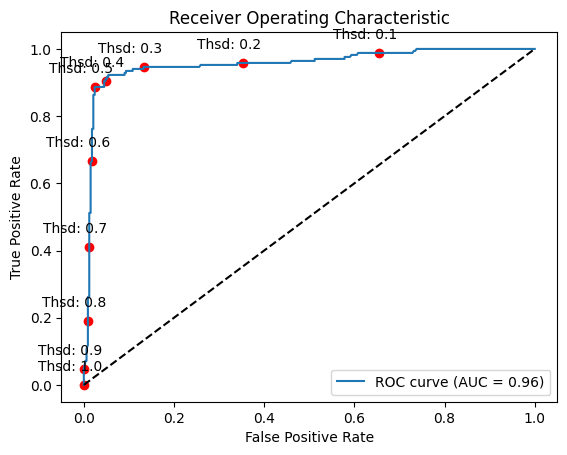

In [26]:
best_x= [0.759317, 0.240683]
x_best = best_x
RFprob_list = RFprob.tolist()
GBprob_list = GBprob.tolist()
SVCprob_list = SVCprob.tolist()
ETprob_list = ETprob.tolist()
DTprob_list = DTprob.tolist()
KNprob_list = KNprob.tolist()
LRprob_list = LRprob.tolist()

# Creazione della matrice
A = np.array([RFprob_list, GBprob_list, SVCprob_list, ETprob_list, DTprob_list, KNprob_list, LRprob_list])


index_best_matrix = [0,1]
best_matrix = A[[index_best_matrix]]
A = np.transpose(best_matrix)
c_pred_ = np.dot(A,x_best)
best_threshold= plot_ROC(y, c_pred_)
c_pred = (c_pred_ > best_threshold).astype(int)
f1_best = f1_score(y, c_pred)

In [27]:
best_x = x_best
print("classi reali:", np.array(y))
print("vs")
print("classi predette:" ,c_pred)
print("soglia",best_threshold)
print("f1_score",f1_best)
print("best_x",best_x)
print("index_best_matrix", index_best_matrix)
print(classification_report(y,c_pred))

confusion_mat = confusion_matrix(y, c_pred)
print("Matrice di confusione:")
print(confusion_mat)




classi reali: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 

In [30]:

print("------------RF---------------------")
y_predRF = RFpipe.predict_proba(X_TEST)[:, 1]  # Probabilità delle classi positive
#y_predRF = apply_threshold(y_scores, threshold_best)  # Applicazione della soglia
#print(classification_report(y_test,y_predRF))

# confusion_mat = confusion_matrix(y_test, y_predRF)
# print("Matrice di confusione:")
# print(confusion_mat)

print("------------GB---------------------")
y_predGB = GBpipe.predict_proba(X_TEST)[:, 1]  # Probabilità delle classi positive
#y_predGB = apply_threshold(y_scores, threshold_best)  # Applicazione della soglia
#print(classification_report(y_test,y_predGB))

# confusion_mat = confusion_matrix(y_test, y_predGB)
# print("Matrice di confusione:")
# print(confusion_mat)
print("------------SVC---------------------")
y_predSVC = SVCpipe.predict_proba(X_TEST)[:, 1]  # Probabilità delle classi positive
#y_predSVC = apply_threshold(y_scores, threshold_best)  # Applicazione della soglia
#print(classification_report(y_test,y_predSVC))

# confusion_mat = confusion_matrix(y_test, y_predSVC)
# print("Matrice di confusione:")
# print(confusion_mat)
print("------------ET---------------------")
y_predET = ETpipe.predict_proba(X_TEST)[:, 1]  # Probabilità delle classi positive
#y_predET = apply_threshold(y_scores, threshold_best)  # Applicazione della soglia
#print(classification_report(y_test,y_predET))

# confusion_mat = confusion_matrix(y_test, y_predET)
# print("Matrice di confusione:")
# print(confusion_mat)

print("-------Decision Tree---------------------")
y_predDT = DTpipe.predict_proba(X_TEST)[:, 1]

print("---------KN----------------")

y_predKN = KNpipe.predict_proba(X_TEST)[:, 1]  # Probabilità delle classi positive

print("---------Logistic Regression----------------")

y_predLR = LRpipe.predict_proba(X_TEST)[:, 1]


------------RF---------------------
------------GB---------------------
------------SVC---------------------
------------ET---------------------
-------Decision Tree---------------------
---------KN----------------
---------Logistic Regression----------------


In [31]:
A = np.array([y_predRF.tolist(),
              y_predGB.tolist(),
              y_predSVC.tolist(),
              y_predET.tolist(),
              y_predDT.tolist(),
              y_predKN.tolist(),
              y_predLR.tolist()])

selected_A = A[[index_best_matrix]]

A = np.transpose(selected_A)

c= np.dot(A, x_best)
c = (c > best_threshold).astype(int)
y_pred = c
print("valori reali",np.array(y_TEST))
print("valori predetti", y_pred)
print(classification_report(y_TEST,y_pred))

confusion_mat = confusion_matrix(y_TEST, y_pred)
print("Matrice di confusione:")
print(confusion_mat)

valori reali [0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1
 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1]
valori predetti [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1
 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        68
           1       0.93      0.81      0.87        32

    accuracy                           0.92       100
   macro avg       0.92      0.89      0.90       100
weighted avg       0.92      0.92      0.92       100

Matrice di confusione:
[[66  2]
 [ 6 26]]


<ipython-input-31-a48641b761e3>:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selected_A = A[[index_best_matrix]]


#Ensemble with combination (with 1 feature) THE BEST

In [32]:
def prob_train(pipe, X, y):
  best_model = None
  best_score = 0
  best_proba = 0

  for train_index, test_index in skf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      pipe.fit(X_train, y_train)
      y_pred = pipe.predict(X_train)
      score = f1_score(y_train, y_pred)

      if score > best_score:
          best_model = pipe
          best_score = score

  best_proba = best_model.predict_proba(X)[:, 1]

  return best_model, best_proba

In [33]:
def apply_threshold(y_scores, threshold):
    return (y_scores >= threshold).astype(int)


#estraggo il dataset
np.random.seed(35)
df = pd.read_csv(file_path)
df_shape = df.shape

#trovo le correlazioni, mostro le correlazioni e le elimino
features_to_remove, correlation_dict_all = correlation_feature(df, df.shape[1], 0.8,subplot=False, noPlot = 1)
print_correlation(correlation_dict_all)
df = delete_correlation(features_to_remove)
df.shape

#splitto il dataset in feature e target
X = df.drop('target', axis=1)
df['target'] = df['target'].apply(lambda x: 1 if x in ['emotion', 'beautiful'] else 0)
y = df['target']

y_TEST = y.iloc[indices_test]
X_TEST = X.iloc[indices_test]


RandomForest = RandomForestClassifier(max_depth=10, n_estimators=200,min_samples_split= 2)
RFfeature_selection__k = 1

GradientBoosting = GradientBoostingClassifier(learning_rate=1, max_depth=None,n_estimators = 100)
GBfeature_selection__k = 1

estimators = [('scaler', StandardScaler()), ('feature_selection', SelectKBest(k=RFfeature_selection__k)), ('classifier', RandomForest)]
RFpipe = Pipeline(estimators)
RFpipe.fit(X, y)
selected_feature = RFpipe.named_steps['feature_selection'].transform(X)
selected_feature_index = np.where(RFpipe.named_steps['feature_selection'].get_support())[0][0]

# Estrai la colonna corrispondente all'indice selected_feature_index
selected_column = X.iloc[:, selected_feature_index]
selected_column_df = pd.DataFrame(selected_column)

RFpipe, RFprob = prob_train(RFpipe, selected_column_df, y)


estimators = [('scaler', StandardScaler()), ('feature_selection', SelectKBest(k=GBfeature_selection__k)), ('classifier', GradientBoosting)]
GBpipe = Pipeline(estimators)
GBpipe, GBprob = prob_train(GBpipe, selected_column_df, y)


For electroid 1, 37/50 -> 0.74 values have been removed
For electroid 2, 40/50 -> 0.8 values have been removed
For electroid 3, 47/50 -> 0.94 values have been removed
For electroid 4, 43/50 -> 0.86 values have been removed
For electroid 5, 37/50 -> 0.74 values have been removed
For electroid 6, 45/50 -> 0.9 values have been removed
For electroid 7, 40/50 -> 0.8 values have been removed
For electroid 8, 41/50 -> 0.82 values have been removed


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


In [34]:
from itertools import combinations
from tqdm import tqdm



threshold_best = 0
f1_best = 0
x_best = 0
# Definisci la funzione obiettivo da massimizzare (F1-score)
def objective(x, A, c):
    y_predict = np.dot(A, x)
    global threshold_best, f1_best,x_best

    for threshold in range(0, 11, 1):
      threshold = threshold / 10.0
      y_predict_binary = (y_predict > threshold).astype(int)
      if f1_best < f1_score(c, y_predict_binary):
        f1_best = f1_score(c, y_predict_binary)
        threshold_best = threshold
        x_best = x
    return -f1_best

# Definisci il vincolo di somma(x) = 1
def constraint(x):
    return np.sum(x) - 1


def create_row_combinations(matrix):
    combinations_list = []
    index_combinations_list = []
    num_rows = len(matrix)
    row_indices = list(range(num_rows))

    for r in range(1, num_rows + 1):
        row_combinations = combinations(matrix, r)
        index_combinations = combinations(row_indices, r)
        combinations_list.extend(row_combinations)
        index_combinations_list.extend(index_combinations)

    return combinations_list, index_combinations_list
# Creazione delle liste delle probabilità
RFprob_list = RFprob.tolist()
GBprob_list = GBprob.tolist()


# Creazione della matrice
A = np.array([RFprob_list, GBprob_list])


# Parametri dell'ottimizzazione multi-start
num_starts = 1000  # Numero di tentativi
best_f1 = -1     # Inizializza il miglior F1-score a un valore negativo
best_x = None    # Inizializza i pesi migliori a None


best_matrix = A
index_best_matrix = 0
f1_best = 0
threshold_best = 0
x_best = 0



c = y
A = np.transpose(A)
# Risolvi il sistema di equazioni lineari A * x = c


for _ in range(num_starts):
  # Inizializza i pesi x (dimensione 4) inizialmente a valori casuali
  x0 = np.random.random(2)
  x0 = x0 / np.sum(x0)

  # Definisci il problema di ottimizzazione
  problem = {'type': 'eq', 'fun': constraint}

  # Risolvi il problema di ottimizzazione per massimizzare l'F1-score
  solution = minimize(objective, x0, args=(A, c), constraints=problem)

  # Ottieni i pesi ottimali e l'F1-score corrispondente
  x_optimal = solution.x
  f1_optimal = -solution.fun

  # Aggiorna i pesi e l'F1-score migliori se necessario
  if f1_optimal > best_f1:
      best_f1 = f1_optimal
      best_x = x_optimal
      best_matrix = A
      index_best_matrix = 2


c_pred_ = np.dot(best_matrix,x_best)
c_pred = (c_pred_ > threshold_best).astype(int)


In [18]:
len(best_x)

2

<ipython-input-35-977bcefcf3c7>:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  best_matrix = A[[index_best_matrix]]


Best threshold: 0.7158339009848506


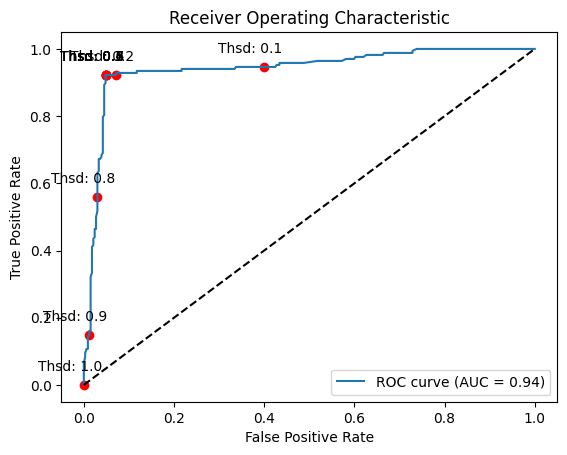

In [35]:

x_best = best_x
RFprob_list = RFprob.tolist()
GBprob_list = GBprob.tolist()


# Creazione della matrice
A = np.array([RFprob_list, GBprob_list])


index_best_matrix = [0,1]
best_matrix = A[[index_best_matrix]]
A = np.transpose(best_matrix)
c_pred_ = np.dot(A,x_best)
best_threshold= plot_ROC(y, c_pred_)
c_pred = (c_pred_ > best_threshold).astype(int)
f1_best = f1_score(y, c_pred)

In [36]:
best_x = x_best
print("classi reali:", np.array(y))
print("vs")
print("classi predette:" ,c_pred)
print("soglia",best_threshold)
print("f1_score",f1_best)
print("best_x",best_x)
print("index_best_matrix", index_best_matrix)
print(classification_report(y,c_pred))

confusion_mat = confusion_matrix(y, c_pred)
print("Matrice di confusione:")
print(confusion_mat)




classi reali: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 

In [37]:
selected_column = X_TEST.iloc[:, selected_feature_index]
selected_column_df = pd.DataFrame(selected_column)

print("------------RF---------------------")
y_predRF = RFpipe.predict_proba(selected_column_df)[:, 1]  # Probabilità delle classi positive
#y_predRF = apply_threshold(y_scores, threshold_best)  # Applicazione della soglia
#print(classification_report(y_test,y_predRF))

# confusion_mat = confusion_matrix(y_test, y_predRF)
# print("Matrice di confusione:")
# print(confusion_mat)

print("------------GB---------------------")
y_predGB = GBpipe.predict_proba(selected_column_df)[:, 1]  # Probabilità delle classi positive
#y_predGB = apply_threshold(y_scores, threshold_best)  # Applicazione della soglia
#print(classification_report(y_test,y_predGB))


------------RF---------------------
------------GB---------------------


In [38]:
A = np.array([y_predRF.tolist(),
              y_predGB.tolist(),
              y_predSVC.tolist(),
              y_predET.tolist(),
              y_predDT.tolist(),
              y_predKN.tolist(),
              y_predLR.tolist()])

selected_A = A[[index_best_matrix]]

A = np.transpose(selected_A)

c= np.dot(A, x_best)
c = (c > best_threshold).astype(int)
y_pred = c
print("valori reali",np.array(y_TEST))
print("valori predetti", y_pred)
print(classification_report(y_TEST,y_pred))

confusion_mat = confusion_matrix(y_TEST, y_pred)
print("Matrice di confusione:")
print(confusion_mat)

valori reali [0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1
 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1]
valori predetti [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1
 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        68
           1       0.96      0.84      0.90        32

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100

Matrice di confusione:
[[67  1]
 [ 5 27]]


<ipython-input-38-a48641b761e3>:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selected_A = A[[index_best_matrix]]


#Ensemble without occombination

In [ ]:



threshold_best = 0
f1_best = 0
x_best = 0
# Definisci la funzione obiettivo da massimizzare (F1-score)
def objective(x, A, c):
    y_predict = np.dot(A, x)
    global threshold_best, f1_best,x_best

    for threshold in range(0, 11, 1):
      threshold = threshold / 10.0
      y_predict_binary = (y_predict > threshold).astype(int)
      if f1_best < f1_score(c, y_predict_binary):
        f1_best = f1_score(c, y_predict_binary)
        threshold_best = threshold
        x_best = x
    return -f1_best

# Definisci il vincolo di somma(x) = 1
def constraint(x):
    return np.sum(x) - 1



# Creazione delle liste delle probabilità
RFprob_list = RFprob.tolist()
GBprob_list = GBprob.tolist()
SVCprob_list = SVCprob.tolist()
ETprob_list = ETprob.tolist()
DTprob_list = DTprob.tolist()
KNprob_list = KNprob.tolist()
LRprob_list = LRprob.tolist()

# Creazione della matrice
A = np.array([RFprob_list, GBprob_list, SVCprob_list, ETprob_list, DTprob_list, KNprob_list, LRprob_list])
# A = np.array([ KNprob_list, LRprob_list])


# Parametri dell'ottimizzazione multi-start
num_starts = 100  # Numero di tentativi
best_f1 = -1     # Inizializza il miglior F1-score a un valore negativo
best_x = None    # Inizializza i pesi migliori a None


best_matrix = A
index_best_matrix = 0
f1_best = 0
threshold_best = 0
x_best = 0



c = y
A = np.transpose(A)
# Risolvi il sistema di equazioni lineari A * x = c
x, residuals, rank, singular_values = np.linalg.lstsq(A, c, rcond=None)


for _ in tqdm(range(num_starts)):
  # Inizializza i pesi x (dimensione 4) inizialmente a valori casuali
  x0 = np.random.random(7)
  x0 = x0 / np.sum(x0)

  # Definisci il problema di ottimizzazione
  problem = {'type': 'eq', 'fun': constraint}

  # Risolvi il problema di ottimizzazione per massimizzare l'F1-score
  solution = minimize(objective, x0, args=(A, c), constraints=problem)

  # Ottieni i pesi ottimali e l'F1-score corrispondente
  x_optimal = solution.x
  f1_optimal = -solution.fun

  # Aggiorna i pesi e l'F1-score migliori se necessario
  if f1_optimal > best_f1:
      best_f1 = f1_optimal
      best_x = x_optimal
      best_matrix = A


c_pred_ = np.dot(best_matrix,x_best)
c_pred = (c_pred_ > threshold_best).astype(int)


100%|██████████| 100/100 [00:16<00:00,  5.97it/s]


In [ ]:

print("classi reali:", np.array(c))
print("vs")
print("classi predette:" ,c_pred)
print("soglia",threshold_best)
print("f1_score",f1_best)
print("best_x",best_x)
print("index_best_matrix", index_best_matrix)
print(classification_report(c,c_pred))

confusion_mat = confusion_matrix(c, c_pred)
print("Matrice di confusione:")
print(confusion_mat)




classi reali: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1
 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 

Best threshold: 0.4920470233689264


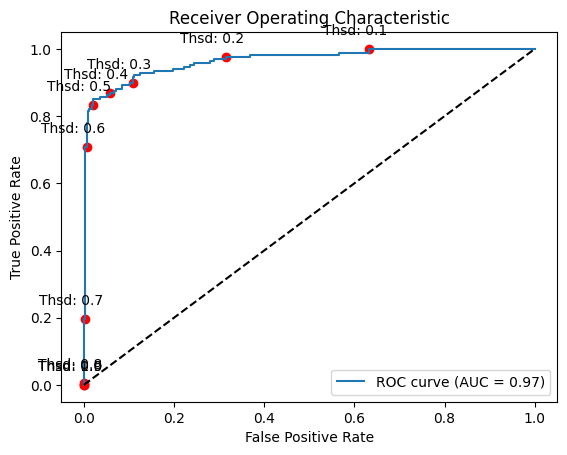

In [65]:
RFprob_list = RFprob.tolist()
GBprob_list = GBprob.tolist()
SVCprob_list = SVCprob.tolist()
ETprob_list = ETprob.tolist()
DTprob_list = DTprob.tolist()
KNprob_list = KNprob.tolist()
LRprob_list = LRprob.tolist()

# Creazione della matrice
A = np.array([RFprob_list, GBprob_list, SVCprob_list, ETprob_list, DTprob_list, KNprob_list, LRprob_list])
x_best = [0.11499168, 0.09046017 ,0.19165728, 0.21130395, 0.1091025,  0.10296649, 0.17951793]
A = np.transpose(A)

c_pred_ = np.dot(A,x_best)
best_threshold= plot_ROC(y, c_pred_)

In [66]:

print("------------RF---------------------")
y_predRF = RFpipe.predict_proba(X_TEST)[:, 1]  # Probabilità delle classi positive
#y_predRF = apply_threshold(y_scores, threshold_best)  # Applicazione della soglia
#print(classification_report(y_test,y_predRF))

# confusion_mat = confusion_matrix(y_test, y_predRF)
# print("Matrice di confusione:")
# print(confusion_mat)

print("------------GB---------------------")
y_predGB = GBpipe.predict_proba(X_TEST)[:, 1]  # Probabilità delle classi positive
#y_predGB = apply_threshold(y_scores, threshold_best)  # Applicazione della soglia
#print(classification_report(y_test,y_predGB))

# confusion_mat = confusion_matrix(y_test, y_predGB)
# print("Matrice di confusione:")
# print(confusion_mat)
print("------------SVC---------------------")
y_predSVC = SVCpipe.predict_proba(X_TEST)[:, 1]  # Probabilità delle classi positive
#y_predSVC = apply_threshold(y_scores, threshold_best)  # Applicazione della soglia
#print(classification_report(y_test,y_predSVC))

# confusion_mat = confusion_matrix(y_test, y_predSVC)
# print("Matrice di confusione:")
# print(confusion_mat)
print("------------ET---------------------")
y_predET = ETpipe.predict_proba(X_TEST)[:, 1]  # Probabilità delle classi positive
#y_predET = apply_threshold(y_scores, threshold_best)  # Applicazione della soglia
#print(classification_report(y_test,y_predET))

# confusion_mat = confusion_matrix(y_test, y_predET)
# print("Matrice di confusione:")
# print(confusion_mat)

print("-------Decision Tree---------------------")
y_predDT = DTpipe.predict_proba(X_TEST)[:, 1]

print("---------KN----------------")

y_predKN = KNpipe.predict_proba(X_TEST)[:, 1]  # Probabilità delle classi positive

print("---------Logistic Regression----------------")

y_predLR = LRpipe.predict_proba(X_TEST)[:, 1]


------------RF---------------------
------------GB---------------------
------------SVC---------------------
------------ET---------------------
-------Decision Tree---------------------
---------KN----------------
---------Logistic Regression----------------


In [70]:
A = np.array([y_predET.tolist(),
              y_predSVC.tolist(),
              y_predRF.tolist(),
              y_predGB.tolist(),
              y_predDT.tolist(),
              y_predKN.tolist(),
              y_predLR.tolist()])

# A = np.array([y_predKN.tolist(),
#               y_predLR.tolist()])


A = np.transpose(A)

c= np.dot(A, x_best)
c = (c > best_threshold).astype(int)
y_pred = c
print("valori reali",np.array(y_TEST))
print("valori predetti", y_pred)
print(classification_report(y_TEST,y_pred))

confusion_mat = confusion_matrix(y_TEST, y_pred)
print("Matrice di confusione:")
print(confusion_mat)

valori reali [0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1
 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1]
valori predetti [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        68
           1       0.92      0.72      0.81        32

    accuracy                           0.89       100
   macro avg       0.90      0.84      0.87       100
weighted avg       0.89      0.89      0.89       100

Matrice di confusione:
[[66  2]
 [ 9 23]]
